In [7]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, box

In [62]:
df = gpd.read_file("../results/results/test_results.shp", )
coastline = gpd.read_file("../data/coastline.shp")

In [64]:
df

,index,confidence,geometry
0,0,0.266870,"POLYGON ((492429.046 4335291.452, 492470.487 4..."
1,1,0.100489,"POLYGON ((492465.230 4335289.735, 492502.250 4..."
2,2,0.150893,"POLYGON ((492428.686 4335263.633, 492470.383 4..."
3,3,0.275458,"POLYGON ((492490.335 4335291.323, 492532.556 4..."
4,4,0.107227,"POLYGON ((492533.058 4335289.428, 492570.059 4..."
...,...,...,...
4132,4132,0.185138,"POLYGON ((512627.952 4353030.770, 512647.693 4..."
4133,4133,0.128300,"POLYGON ((512625.626 4352898.181, 512651.247 4..."
4134,4134,0.107785,"POLYGON ((512627.209 4352851.463, 512649.809 4..."
4135,4135,0.106142,"POLYGON ((512625.499 4352830.580, 512651.224 4..."


In [65]:
# todo: clip keeps boxes that intersect with coastline. Find a better way
df = df.loc[df.within(coastline.loc[0, "geometry"])]

In [66]:
df

,index,confidence,geometry
2038,2038,0.264286,"POLYGON ((498662.391 4352494.472, 498670.302 4..."
2039,2039,0.139845,"POLYGON ((498661.920 4352488.472, 498670.473 4..."
2103,2103,0.242154,"POLYGON ((498699.356 4352802.313, 498708.708 4..."
2104,2104,0.331996,"POLYGON ((498709.147 4352735.498, 498718.008 4..."
2105,2105,0.375806,"POLYGON ((498696.330 4352671.340, 498713.147 4..."
...,...,...,...
4124,4124,0.360763,"POLYGON ((512560.531 4353124.049, 512568.878 4..."
4125,4125,0.321465,"POLYGON ((512633.415 4353659.208, 512643.444 4..."
4126,4126,0.349446,"POLYGON ((512635.210 4353594.131, 512643.257 4..."
4127,4127,0.343794,"POLYGON ((512629.166 4353570.867, 512636.235 4..."


In [71]:
merged = gpd.GeoDataFrame(geometry=list(df.unary_union))
merged['polyID'] = merged.index
points = df.copy()
points['geometry'] =points['geometry'].centroid
df = gpd.sjoin(merged.set_crs(points.crs), points, op='contains')

df = df.dissolve(by='polyID', aggfunc='mean')

df = df.drop(["index_right", "index"], axis=1)

In [72]:
res_bbox = df.copy()
res_bbox["geometry"] = res_bbox.geometry.apply(lambda x: box(*x.bounds))
res_bbox = res_bbox.set_crs(df.crs)

In [73]:
df

,geometry,confidence
polyID,,
0,"POLYGON ((504157.090 4346532.918, 504153.298 4...",0.141959
1,"POLYGON ((505082.458 4349217.633, 505082.458 4...",0.334212
2,"POLYGON ((503925.778 4349376.806, 503925.778 4...",0.122452
3,"POLYGON ((502936.377 4348615.003, 502932.949 4...",0.111056
4,"POLYGON ((503230.374 4349085.336, 503230.374 4...",0.149852
...,...,...
733,"POLYGON ((511963.177 4353804.323, 511969.982 4...",0.313929
734,"POLYGON ((512110.963 4353809.045, 512121.792 4...",0.305157
735,"POLYGON ((512068.596 4353818.822, 512075.893 4...",0.325079


In [74]:
truth = gpd.read_file("../data/test_bbox_rev.shp")

In [76]:
res_bbox

,geometry,confidence
polyID,,
0,"POLYGON ((504157.090 4346532.918, 504157.090 4...",0.141959
1,"POLYGON ((505096.351 4349217.633, 505096.351 4...",0.334212
2,"POLYGON ((503925.778 4349317.535, 503925.778 4...",0.122452
3,"POLYGON ((502936.377 4348615.003, 502936.377 4...",0.111056
4,"POLYGON ((503238.981 4349085.336, 503238.981 4...",0.149852
...,...,...
733,"POLYGON ((511969.982 4353796.868, 511969.982 4...",0.313929
734,"POLYGON ((512121.792 4353800.095, 512121.792 4...",0.305157
735,"POLYGON ((512075.893 4353809.487, 512075.893 4...",0.325079


In [77]:
truth

,MAPA,DELEGACIO,MUNICIPIO,MASA,PARCELA,HOJA,TIPO,CONSTRU,COORX,COORY,...,CONTROL,REFCAT,layer,path,width,height,area_1,perimeter,area_2,geometry
0,7016,7,13,017,00012,07013A,R,PI,500103.51,4353552.89,...,None,07013A01700012,campos_r,/home/biel/Documents/Master/TFM/cadastre/extra...,12.0800,9.2700,111.981600,42.700,14.0800,"POLYGON ((500097.106 4353547.872, 500097.106 4..."
1,7045,7,57,0001,034,00ED15A,D,PI,510662.84,4351960.40,...,None,000103400ED15A,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,10.1000,10.9600,110.696000,42.120,12.1000,"POLYGON ((510656.790 4351953.920, 510656.790 4..."
2,7045,7,57,0001,044,00ED15A,D,PI,510445.68,4352158.87,...,None,000104400ED15A,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,13.0972,14.1153,184.870907,54.425,15.0972,"POLYGON ((510437.941 4352150.659, 510437.941 4..."
3,7045,7,57,003,00418,07057A,R,PI,511570.07,4353834.66,...,None,07057A00300418,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,3.3900,3.3800,11.458200,13.540,5.3900,"POLYGON ((511567.360 4353832.060, 511567.360 4..."
4,7045,7,57,003,00435,07057A,R,PI,511946.98,4353569.72,...,None,07057A00300435,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,8.1600,4.7700,38.923200,25.860,10.1600,"POLYGON ((511941.730 4353565.940, 511941.730 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,7045,7,57,005,01276,07057A,R,PI,511860.26,4352080.15,...,None,07057A00501276,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,7.9100,7.8200,61.856200,31.460,9.9100,"POLYGON ((511911.232 4352099.075, 511911.232 4..."
561,7057,7,57,16227,01,ED1512S,U,PI,511686.15,4351998.47,...,None,1622701ED1512S,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,6.2500,7.7400,48.375000,27.980,8.2500,"POLYGON ((511678.502 4352022.089, 511678.502 4..."
562,7107,7,59,002,00033,07059A,R,PI,502273.56,4353699.05,...,None,07059A00200033,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,11.1600,8.4800,94.636800,39.280,13.1600,"POLYGON ((502388.848 4353690.502, 502388.848 4..."
563,7107,7,59,002,00122,07059A,R,PI,501212.67,4353228.44,...,None,07059A00200122,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,11.5600,9.7200,112.363200,42.560,13.5600,"POLYGON ((501235.762 4353235.753, 501235.762 4..."


<AxesSubplot:>

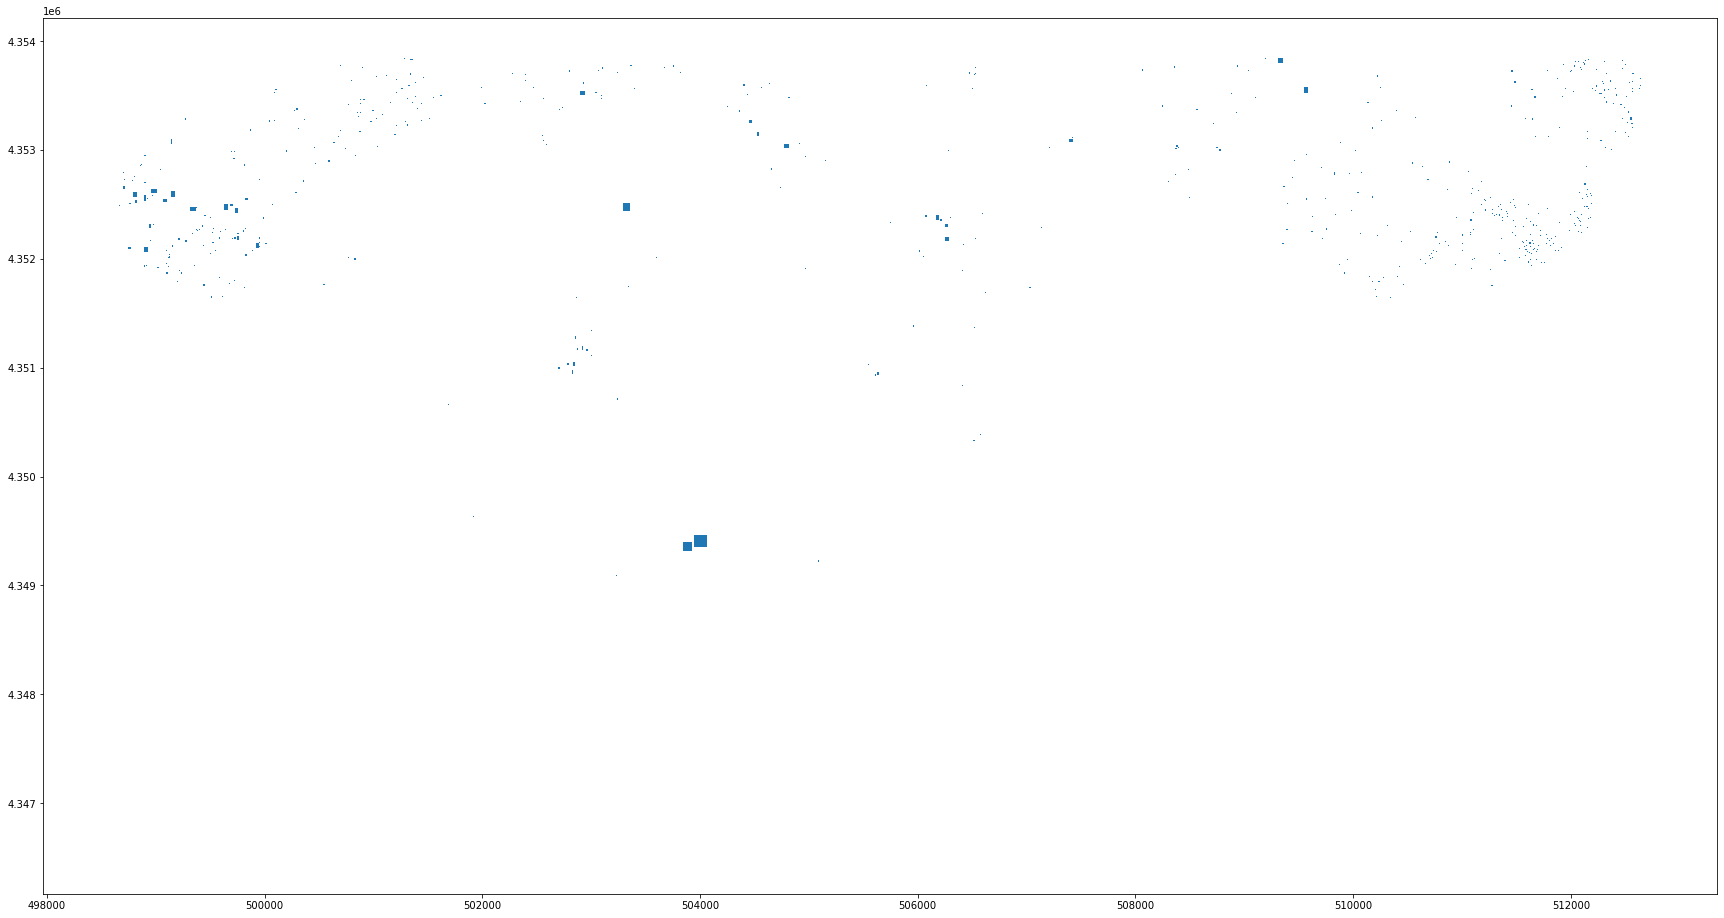

In [78]:
res_bbox.plot(figsize=(30,30))

In [79]:
gpd.overlay(res_bbox, truth)

,confidence,MAPA,DELEGACIO,MUNICIPIO,MASA,PARCELA,HOJA,TIPO,CONSTRU,COORX,...,CONTROL,REFCAT,layer,path,width,height,area_1,perimeter,area_2,geometry
0,0.334212,7045,7,57,006,00001,07057A,R,PI,505088.98,...,None,07057A00600001,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,13.240,12.9500,171.458000,52.380,15.240,"POLYGON ((505082.458 4349217.633, 505082.458 4..."
1,0.314654,7045,7,57,006,00072,07057A,R,PI,505612.98,...,None,07057A00600072,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,7.634,12.6490,96.562466,40.566,9.634,"POLYGON ((505609.181 4350927.309, 505609.181 4..."
2,0.303448,7107,7,59,002,00122,07059A,R,PI,501212.67,...,None,07059A00200122,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,11.560,9.7200,112.363200,42.560,13.560,"POLYGON ((501192.467 4353138.798, 501192.467 4..."
3,0.370898,7107,7,59,009,00060,07059A,R,PI,502586.52,...,None,07059A00900060,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,7.030,7.0395,49.487685,28.139,9.030,"POLYGON ((502582.183 4353050.466, 502582.183 4..."
4,0.253133,7107,7,59,009,00062,07059A,R,PI,502556.36,...,None,07059A00900062,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,8.910,6.0000,53.460000,29.820,10.910,"POLYGON ((502551.852 4353135.700, 502561.465 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.313929,7057,7,57,20401,10,ED1514S,U,PI,511965.66,...,None,2040110ED1514S,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,6.340,7.0400,44.633600,26.760,8.340,"POLYGON ((511969.982 4353796.868, 511963.177 4..."
506,0.305157,7057,7,57,21408,07,ED1524S,U,PI,512113.15,...,None,2140807ED1524S,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,10.750,8.9700,96.427500,39.440,12.750,"POLYGON ((512121.792 4353800.095, 512110.963 4..."
507,0.325079,7057,7,57,21408,04,ED1524S,U,PI,512069.67,...,None,2140804ED1524S,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,7.730,9.3600,72.352800,34.180,9.730,"POLYGON ((512075.893 4353809.487, 512068.596 4..."
508,0.139570,7057,7,57,20406,02,ED1524S,U,PI,512042.51,...,None,2040602ED1524S,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,9.920,6.5100,64.579200,32.860,11.920,"POLYGON ((512036.243 4353812.560, 512036.243 4..."


In [83]:
overlaps = gpd.sjoin(res_bbox, truth)

<AxesSubplot:>

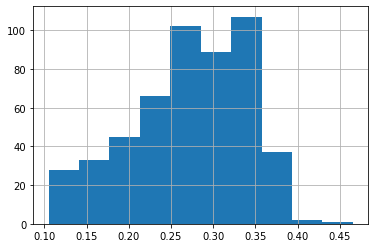

In [85]:
res_bbox.loc[overlaps.index]["confidence"].hist()

<AxesSubplot:>

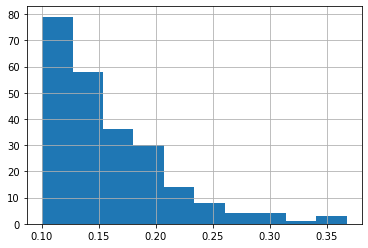

In [87]:
res_bbox.loc[~res_bbox.index.isin(overlaps.index)]["confidence"].hist()

In [88]:
res_bbox.loc[overlaps.index]

,geometry,confidence
polyID,,
1,"POLYGON ((505096.351 4349217.633, 505096.351 4...",0.334212
6,"POLYGON ((505616.948 4350927.309, 505616.948 4...",0.314654
26,"POLYGON ((501203.042 4353138.798, 501203.042 4...",0.303448
31,"POLYGON ((502589.933 4353050.466, 502589.933 4...",0.370898
33,"POLYGON ((502561.465 4353128.638, 502561.465 4...",0.253133
...,...,...
733,"POLYGON ((511969.982 4353796.868, 511969.982 4...",0.313929
734,"POLYGON ((512121.792 4353800.095, 512121.792 4...",0.305157
735,"POLYGON ((512075.893 4353809.487, 512075.893 4...",0.325079


In [91]:
res_bbox.shape[0]

738

In [92]:
res_bbox.loc[~res_bbox.index.isin(overlaps.index)].shape[0]

237

In [93]:
res_bbox.loc[~res_bbox.index.isin(overlaps.index)].to_file("../results/hard_negative.geojson", driver='GeoJSON')

In [94]:
738 - 237

501

In [95]:
res_bbox.loc[overlaps.index].to_file("../results/hard_posotive.geojson", driver='GeoJSON')